In [20]:
suppressMessages({
    library("DESeq2")
    library(pheatmap)
    library(withr)
    #library(tidyverse)
    library(RColorBrewer)
    library(gplots)
    library(dplyr)
    })

In [21]:
setwd("/data/home/ysh980101/2312/Data")
getwd()
S1 <- 'other'
S2 <- 'EBV'

[1] "/data1/home/ysh980101/2312/Data"

In [22]:
countdata <- read.csv("count.csv", header=TRUE, sep=',')

In [23]:
countdata <- countdata %>% select(-ensembl_id)

In [24]:
metadata <- read.csv("meta.csv", header=TRUE, sep=",")

In [25]:
metadata <- metadata %>% select(-Hypermethylation.category)

In [26]:
metadata <- metadata %>% mutate(Subtype = ifelse(Subtype != "EBV", "other", Subtype))

In [27]:
dim(metadata)

[1] 345   2

In [28]:
dim(countdata)

[1] 19938   346

In [29]:
metadata <- metadata[order(metadata$sampleID), ]
countdata <- countdata[, sort(colnames(countdata))]
colnames(countdata) <- gsub("\\.", "-", colnames(countdata))

In [30]:
sample.names <- metadata$sampleID
conditions <- metadata$Subtype

In [31]:
rownames(countdata) <- countdata$gene_symbol
countdata$gene_symbol <- NULL

In [32]:
cData <- countdata

In [34]:
cData <- cData[rowSums(cData != 0, na.rm = TRUE) > 0, ]

In [36]:
dim(cData)

[1] 19537   345

In [37]:
dds <- DESeqDataSetFromMatrix(countData = cData,
                                colData = metadata,
                                design = ~Subtype)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
"some variables in design formula are characters, converting to factors"


In [38]:
dds$Subtype <- relevel(dds$Subtype, ref = S1)
colData(dds)

DataFrame with 345 rows and 2 columns
                       sampleID  Subtype
                    <character> <factor>
TCGA-3M-AB46-01 TCGA-3M-AB46-01    other
TCGA-3M-AB47-01 TCGA-3M-AB47-01    other
TCGA-B7-5816-01 TCGA-B7-5816-01    other
TCGA-B7-5818-01 TCGA-B7-5818-01    EBV  
TCGA-B7-A5TI-01 TCGA-B7-A5TI-01    other
...                         ...      ...
TCGA-VQ-AA6G-01 TCGA-VQ-AA6G-01    other
TCGA-VQ-AA6I-01 TCGA-VQ-AA6I-01    other
TCGA-VQ-AA6J-01 TCGA-VQ-AA6J-01    other
TCGA-ZA-A8F6-01 TCGA-ZA-A8F6-01    other
TCGA-ZQ-A9CR-01 TCGA-ZQ-A9CR-01    other

In [39]:
dds <- DESeq(dds)                                            
#rld <- rlogTransformation(dds, blind = FALSE)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 2552 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [40]:
res <- results(dds, contrast = c("Subtype", S1, S2))
res_tbl <- as.data.frame(res)
res_tbl$GeneID <- rownames(res_tbl)
res_tbl <- res_tbl[order(res_tbl$pvalue), ]
#write.csv(res_tbl, file = paste0('./', dir, '/res_', S2, '_', S1, '.csv'))

In [41]:
res_tbl

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,GeneID
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
CLDN3,10450.67815,7.318543,0.2866058,25.53522,8.013276e-144,1.565554e-139,CLDN3
HOXA10,682.43150,4.850829,0.2955253,16.41426,1.512091e-60,1.477086e-56,HOXA10
SLC6A8,5698.83336,3.382722,0.2123591,15.92925,3.970653e-57,2.585822e-53,SLC6A8
TXNRD3,353.30420,2.281672,0.1545523,14.76311,2.533276e-49,1.035551e-45,TXNRD3
KCNK15,513.63500,5.410548,0.3665667,14.76007,2.650231e-49,1.035551e-45,KCNK15
ERVMER34-1,371.06580,5.111255,0.3472401,14.71966,4.820887e-49,1.569761e-45,ERVMER34-1
HYLS1,368.05087,2.127640,0.1468904,14.48455,1.517226e-47,4.234578e-44,HYLS1
MFSD6L,195.17500,4.589957,0.3174632,14.45824,2.224277e-47,5.431963e-44,MFSD6L
C5orf63,340.12146,2.295954,0.1603157,14.32145,1.607338e-46,3.489173e-43,C5orf63


In [43]:
write.csv(res_tbl, file = "../Res/res.ebv.other.csv")

In [50]:
dir <- 'DESeq2'
S1 <- '33'
S2 <- '150'

In [51]:
sample.names <- sort(paste(c(paste0(S1,"-1"),paste0(S1,"-2"),paste0(S1,"-3"),paste0(S2,"-1"),paste0(S2,"-2"),paste0(S2,"-3")), sep=""))
file.names <- paste("../Count/count_",sample.names, ".txt", sep="")
conditions <- factor(c(S1,S1,S1,S2,S2,S2))
sampleTable <- data.frame(sampleName=sample.names,fileName=file.names,condition=conditions)
ddsHTSeq<-DESeqDataSetFromHTSeqCount(sampleTable=sampleTable, directory=".",design=~condition)
ddsHTSeq<-ddsHTSeq[rowSums(counts(ddsHTSeq)) > 10,]
ddsHTSeq$condition <- relevel(ddsHTSeq$condition, ref = S2)
dds<-DESeq(ddsHTSeq)
rld <- rlogTransformation(dds, blind=FALSE)
res <- results(dds, contrast=c("condition",S1,S2))
res_tbl <- res %>%
    data.frame() %>%
    rownames_to_column(var="GeneID") %>%
    as_tibble()
res_tbl <- res_tbl[order(res_tbl$pvalue), ]
#write_csv(res_tbl, paste0('../',dir,'/res_',S2,'_',S1,'.csv'))

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



[1] "33 vs 150 | padj<0.001"


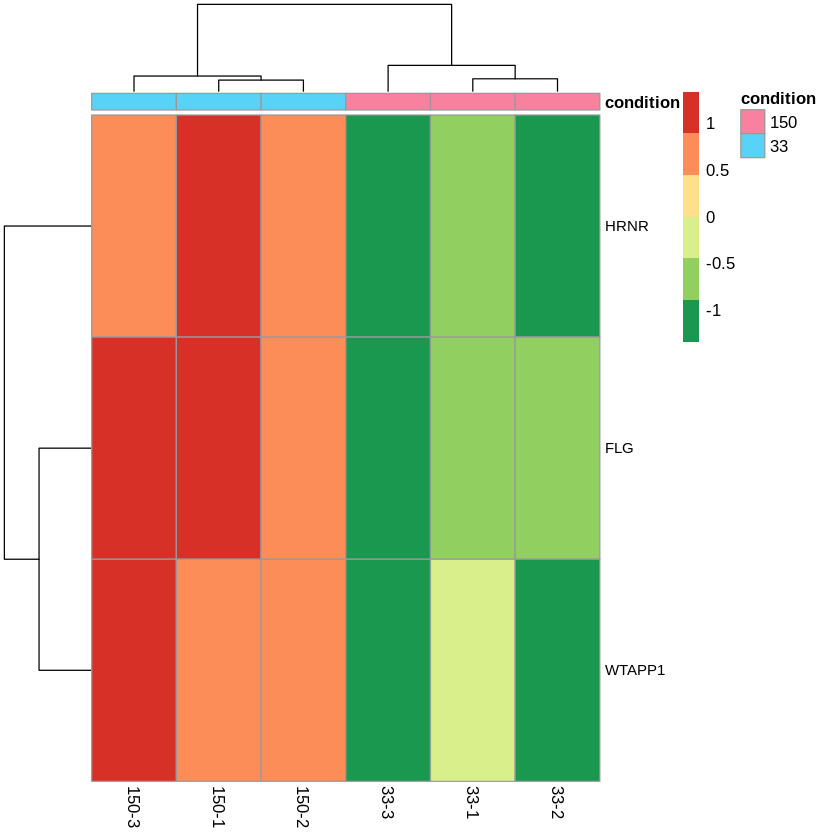

In [36]:
# padj
val_str <- 'padj'
cutoff <- 0.001
cutoff_str <- as.character(cutoff)


sig_res <- dplyr::filter(res_tbl, padj < cutoff) %>% dplyr::arrange(padj)
write_csv(sig_res, paste0('../',dir,'/res_',S2,'_',S1,'_',val_str,cutoff_str,'.csv'))

print(paste0(S1,' vs ',S2,' | ',val_str,'<',cutoff_str))
sig.dat <- assay(rld)[res$padj < cutoff & !is.na(res$padj),]
annC <- data.frame(condition=conditions)
rownames(annC) <- colnames(sig.dat)
heat_colors <- brewer.pal(6, "RdYlGn")
heat_colors_reversed <- rev(heat_colors)
ann_colors = list(condition = setNames(c("#F7819F", "#58D3F7"), c(S2, S1)))
pheatmap(sig.dat, 
         scale="row", 
         fontsize_row=9,
         annotation_col = annC,
         color = heat_colors_reversed,
         annotation_colors = ann_colors,
        show_rownames = TRUE,
        show_colnames = TRUE)

[1] "33 vs 150 | pv<0.05"


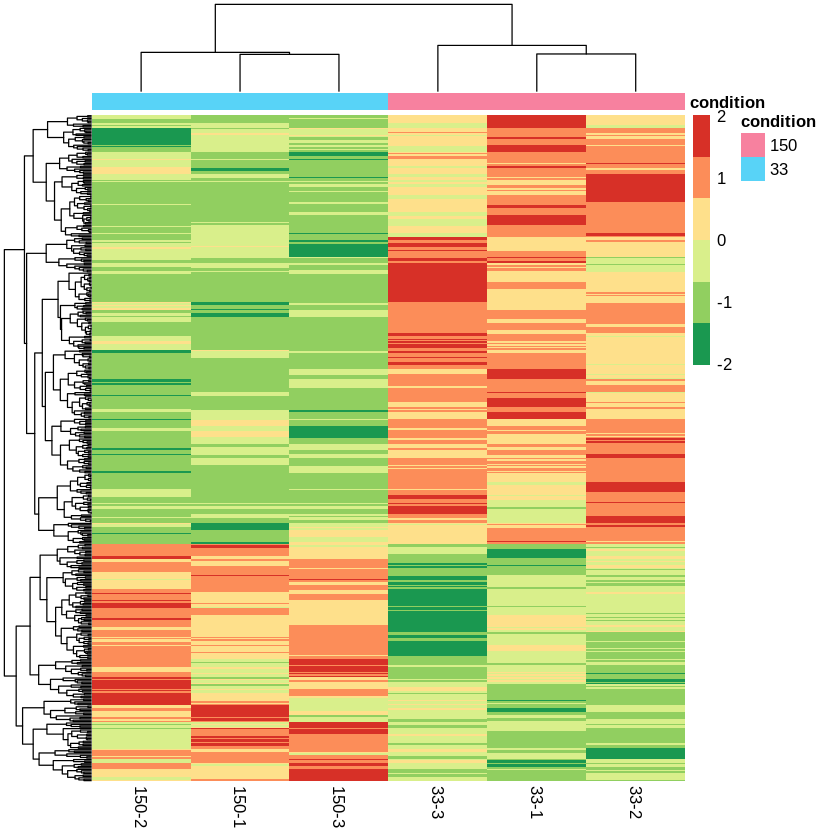

In [52]:
# p value
val_str <- 'pv'
cutoff <- 0.05
cutoff_str <- as.character(cutoff) 


sig_res <- dplyr::filter(res_tbl, pvalue < cutoff) %>% dplyr::arrange(pvalue)
#write_csv(sig_res, paste0('../',dir,'/res_',S2,'_',S1,'_',val_str,cutoff_str,'.csv'))

print(paste0(S1,' vs ',S2,' | ',val_str,'<',cutoff_str))
sig.dat <- assay(rld)[res$pvalue < cutoff & !is.na(res$pvalue),]
annC <- data.frame(condition=conditions)
rownames(annC) <- colnames(sig.dat)
heat_colors <- brewer.pal(6, "RdYlGn")
heat_colors_reversed <- rev(heat_colors)
ann_colors = list(condition = setNames(c("#F7819F", "#58D3F7"), c(S2, S1)))
pheatmap(sig.dat, 
         scale="row", 
         fontsize_row=9,
         annotation_col = annC,
         color = heat_colors_reversed,
         annotation_colors = ann_colors,
        show_rownames = FALSE,
        show_colnames = TRUE)

[1] "33 vs 150 | pv<0.05"


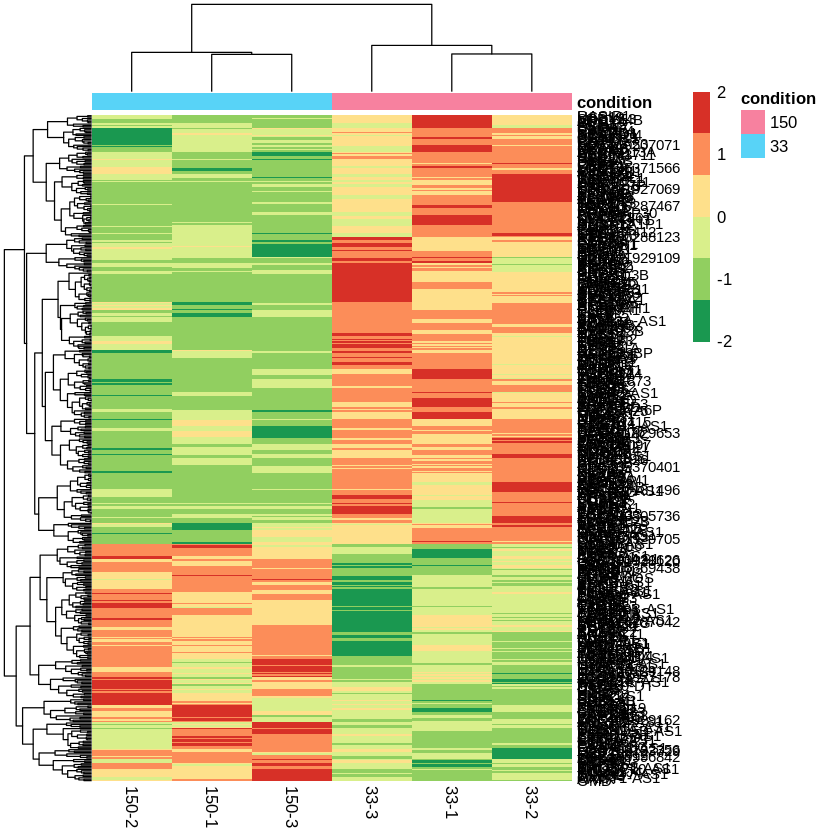

In [53]:
val_str <- 'pv'
cutoff <- 0.05
cutoff_str <- as.character(cutoff) 
print(paste0(S1,' vs ',S2,' | ',val_str,'<',cutoff_str))
sig.dat <- assay(rld)[res$pvalue < cutoff & !is.na(res$pvalue),]
heatmap_object <- pheatmap(sig.dat, 
                           scale="row", 
                           fontsize_row=9,
                           annotation_col = annC,
                           color = heat_colors_reversed,
                           annotation_colors = ann_colors,
                           show_rownames = TRUE,
                           show_colnames = TRUE)    
saveRDS(heatmap_object, paste0('../',dir,'/',S2,'_',S1,'_',val_str,cutoff_str,'.rds'))